In [130]:
import tensorflow as tf
import numpy as np 
from matplotlib import pyplot as plt
from IPython import display

In [131]:
def history_plot(history):
    fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10, 5))

    axs[0].plot(history.history['loss'], label='loss')
    axs[0].plot(history.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend()
    axs[1].plot(history.history['accuracy'], label='accuracy')
    axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend()
    plt.show()

In [132]:
a, b = 0.5, 1.4
observations = 100

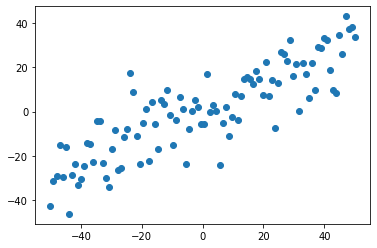

In [133]:
xs = np.linspace(-50, 50, num = observations)

generated_target = np.random.normal(loc = a * xs + b, scale = 10.0, size = observations)

generated_inputs = xs.reshape(-1, 1)

plt.scatter(generated_inputs[:, 0], generated_target)

(1000, 1)


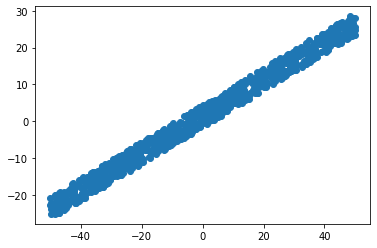

In [109]:
generated_inputs = np.random.uniform(-50,50,(observations,1))
print(generated_inputs.shape)

noise=np.random.uniform(-3,3,(observations,1))
generated_target = a * generated_inputs + b + noise

plt.scatter(generated_inputs[:, 0], generated_target)

In [141]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape = (1, ), activation='linear')
                            ])
                            
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [142]:
history = model.fit(generated_inputs, generated_target, epochs = 400, validation_split = 0.2)
display.clear_output()

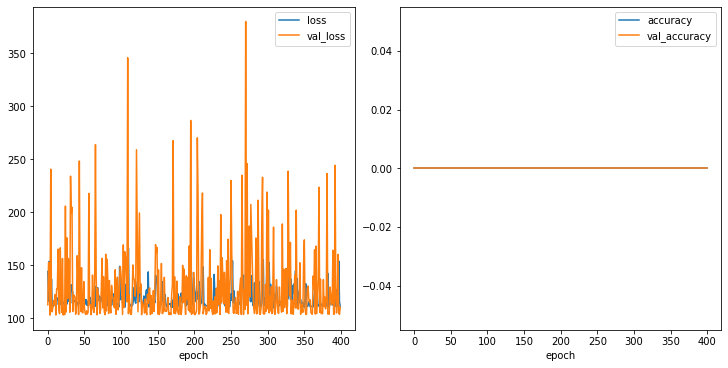

In [143]:
history_plot(history)

In [153]:
weights=model.layers[0].get_weights()[0]
bias=model.layers[0].get_weights()[1]
print(weights)
print(bias)

[[0.51686084]]
[0.7129504]


In [154]:
print(f'Weights err: \nda = {np.abs(a - weights[0][0])} \ndb = {np.abs(b - bias[0])}')

Weights err: 
da = 0.01686084270477295 
db = 0.6870495915412902


In [139]:
out=generated_target.round(1)
from sklearn.metrics import mean_squared_error
mean_squared_error(generated_target, out, squared=False)

0.028140491639171532

На сетке


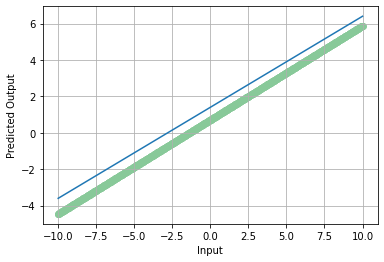

In [159]:
print('На сетке')
x_space = np.linspace(-10, 10, 1000)
plt.plot(x_space, a * x_space + b)
plt.scatter(x_space, model.predict(x_space),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.grid()
plt.show()

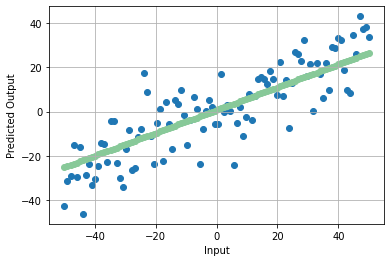

In [152]:
print('')
plt.scatter(xs, generated_target)
plt.scatter(generated_inputs, model.predict(generated_inputs),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.grid()
plt.show()

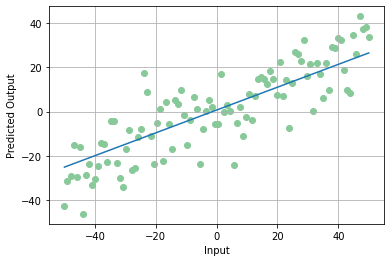

In [157]:
plt.scatter(xs, generated_target,c='#88c999')
plt.plot(generated_inputs, weights[0][0] * xs + bias[0])
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.grid()
plt.show()

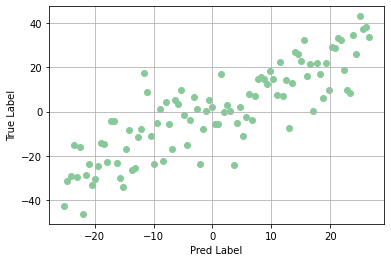

In [148]:
plt.scatter(np.squeeze(model.predict(generated_inputs)),np.squeeze(generated_target),c='#88c999')
plt.xlabel('Pred Label')
plt.ylabel('True Label')
plt.grid()
plt.show()